# AOS 51, Winter 2019, Final Lab Assignment

Download this Notebook and rename it with your name in the title (e.g. "Neil_Berg_Final_Lab_Assignment.ipynb"). 

Email me (nberg@ioes.ucla.edu) your Notebook by 5pm on Wednesday, March 13, 2019.

Good luck! Remember to review previous lab notes and in-lab exercises and then search Google, Stackoverflow, blog posts, etc. if you get stuck. 

---

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy import stats

# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Problem #1 - The Seas Are Rising! 🌊🌊🌊

Sea level rise is one of the most alarming aspects of climate change and can be detected in observations now.

In this problem, we'll examine 1930-2018 observations of sea levels for three US cities:
 - Baltimore, MD
 - Key West, FL
 - Los Angeles, CA 

The data file `Balt_KeyWest_LA_sealevels.csv` contains monthly sea levels (unit: feet) for each of these cities from January 1930 through December 2018. 

Note: sea levels are measured from a [vertical datum](https://tidesandcurrents.noaa.gov/datums.html?id=9410660), which is a defined elevation above the ground. "Negative" sea level heights simply mean below the height of the datum.

### Data

 - `Balt_KeyWest_LA_sealevels.csv` 
 - Monthly sea levels releative to each city's datum from 1930-01 to 2018-12

### Coding tasks 

1. Read in the file `Balt_KeyWest_LA_sealevels.csv` to create a Pandas DataFrame that has a DatetimeIndex corresponding to the dates in the dataset.
2. Resample the data to form annual means.
3. Using annual means, compute the average sea levels during 1930-1959 and 1999-2018 for each city.
4. Calculate the change in sea levels based on the 1999-2018 average and 1930-1959 average.

### Visualization tasks

- Using Matplotlib (not `pd.plot()`), create a time series of lines showing the 1930-2018 annual average sea levels for each city.

- Make sure your plot includes appropriate labels, legends, colors, units, etc. 

### Writing tasks 

1. How much have sea levels risen for Baltimore, Key West, and LA between the last 30 years (1998-2018) and the first 30 years when observations began (1930-1959)?

2. Based on this result, are sea levels rising faster on the US East Coast or West Coast? 

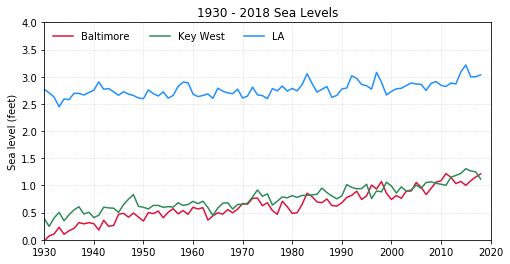

In [29]:
# Read in the csv file
df = pd.read_csv('/Users/nberg/AOS51/data/Balt_KeyWest_LA_sealevels.csv', index_col=0, parse_dates=True)

# Resample to annual means
df_annual = df.resample('AS').mean()

# 1930-1959 and 1999-2018 averages
df_1930_1959_avg = df_annual.loc['1930-01':'1959-12'].mean()
df_1999_2018_avg = df_annual.loc['1999-01':'2018-12'].mean()

# Observed change in sea levels
df_change = df_1999_2018_avg - df_1930_1959_avg

# Time series (line plots) of each annual time series using matplotlib
years = np.arange(1930, 2019)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(years, df_annual['Balt'], color='crimson', label='Baltimore')
ax.plot(years, df_annual['KeyWest'], color='seagreen', label='Key West')
ax.plot(years, df_annual['LA'], color='dodgerblue', label='LA')
ax.set_xlim(1930, 2020)
ax.set_ylim(0,4)
ax.set_ylabel('Sea level (feet)')
ax.set_title('1930 - 2018 Sea Levels')
ax.grid(axis='both', color='lightgrey', linestyle='dotted')
plt.legend(loc='upper left', frameon=False, ncol=3)
plt.show()

Sea level changes:

 - Baltimore: 0.65 feet
 - Key West: 0.51 feet
 - Los Angeles: 0.18 feet
 
Seas are rising much faster along the US East Coast!

---
# Problem #2 - Where's the Snow Going? ❄️ ❄️ ❄️ 

In this problem, we'll examine historical observations and future model projections of April snowpack over the Southern Sierra Nevada - an area that is a critical source of drinking water for Los Angeles.  


### Data

- `S_Sierra_April_snowpack.csv`
- Annual April snowpack from 1954-2005 (observed) and 2006-2099 (projections from 4 global climate models)

### Coding tasks

1. Read in `S_Sierra_April_snowpack.csv` and create a Pandas DataFrame with a corresponding DatetimeIndex.
2. Convert the units in the DataFrame from inches to millimeters. 
3. Create a new column in the DataFrame called `GCMAVG` representing the average projection across GCM1, GCM2, GCM3, and GCM4.
4. Create a new column in the DataFrame called `obs_100` storing True/False values indicating whether a given observed year had snowpack exceeding 100 mm.
5. Create a new column in the DataFrame called `GCMAVG_100` storing True/False values indicating whether a given future year in the `GCMAVG` projection exceeds 100 mm. 
6. Calculate the number of historical years during 1981-2000 above 100 mm.
7. Calculate the number of future years during 2041-2060 in the GCMAVG projection above 100 mm.
8. Calculate the number of future years during 2080-2099 in the GCMAVG projection above 100 mm.


### Visualization tasks 

Using `matplotlib`, create a time series [bar plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) displaying observed (1950-2005) and GCM-average projected snowpack values (2006-2099). 

* Hint: set `width=1` in your plotting command.
* Make your plot look fantastic and include appropriate labels, colors, etc!

### Writing tasks
* Based on the results from the calculations and visualization, is snowpack over the Southern Sierra projected to increase or decrease in the future? 

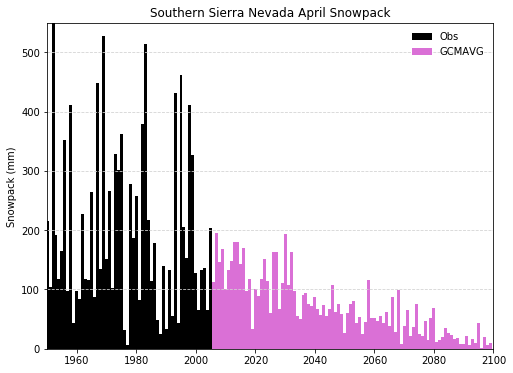

In [102]:
# Read in the csv file and create a dataframe
df = pd.read_csv('/Users/nberg/AOS51/data/S_Sierra_April_snowpack.csv', index_col=0, parse_dates=True)

# Convert from inches to mm
df_mm = df * 25.4

# Compute the GCM average as a new column
df_mm['GCMAVG'] = df_mm.mean(axis=1)

# Calculate number of years >= 100 mm
df_mm['obs_100'] = df_mm['OBS'] > 100
df_mm['GCMAVG_100'] = df_mm['GCMAVG'] > 100

# Number of historical years during 1981-2000 > 100 mm [=14]
hist_snow_years = df_mm['obs_100'].loc['1981':'2000'].sum()

# Number of future years in the GCMAVG 2041-2060 above 100 m [=2]
mid_fut_snow_years = df_mm['GCMAVG_100'].loc['2041':'2060'].sum()

# Number of future years in the GCMAVG 2080-20099 above 100 m [=0]
late_fut_snow_years = df_mm['GCMAVG_100'].loc['2080':'2099'].sum()

# Time series plot
obs_years = np.arange(1950, 2006)
fut_years = np.arange(2006, 2100)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.bar(obs_years, df_mm['OBS'].loc['1950':'2005'], width=1, color='black', label='Obs')
ax.bar(fut_years, df_mm['GCMAVG'].loc['2006':'2099'], width=1, color='orchid', label='GCMAVG')
ax.set_ylim(0,550)
ax.set_xlim(1950,2100)
ax.set_ylabel('Snowpack (mm)')
ax.set_title('Southern Sierra Nevada April Snowpack')
ax.grid(axis='y', color='lightgrey', linestyle='dashed')
plt.legend(loc='upper right', frameon=False)
plt.show()

# Problem #3 - Global Temperature Change 🌡🌡🌡

In this problem, we'll examine historical (1960-1984) and future (2076-2100) patterns of surface air temperature from the MIROC-ESM global climate model.

Download the two data files below from the Google Drive Data folder and move them to a local directory on your machine so you can read them into your Notebook. 

** Data files: **

- `tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc` 
    - monthly global surface temperature from Jan 1960 - Dec 1984

- `tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc` 
    - monthly global temperature from Jan 2076 - Dec 2100

** Coding tasks: **

* Read in the global historical and future temperature netCDF files
* Extract the temperature variable and convert it from degrees Kelvin to Celsius
* Compute each month's average temperature for the historical and future periods (in other words, compute the January 1960-1984 average, the January 2076-2100 average, and so forth for every other month)
    * Hint: use the `groupby` function in `xarray`
* Extract monthly average temperatures for the historical and future periods over Los Angeles 
    * Note: Use the coordinates of 34.05 degrees N, 241.86 degrees E
* Compute the average monthly temperature for each grid cell across the historical and future time periods (i.e. average across the entire time series for both time periods)
* Calculate the change (future average - historical average) in average monthly temperature across the globe

** Visualization tasks:**

(1) Use `matplotlib` to create a timeseries of monthly average temperatures over Los Angeles for the historical and future periods. 

* This plot should have two lines, one for the historical period and one for the future period.
* Include a legend in your plot using matplotlib's [legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) command. Make sure you have a `label` attribute for each of your lines and call `ax.legend()` at the end of the script. 
   * Hint: your code should have lines similar to the two lines below:
   * `ax.plot(x_data, y_data, label='label for this line')`
   * `ax.legend(loc='upper left')`
* Rename the x-tick labels to calendar months or abbreviations of them. 
* Make sure you have a title, label the axes, and use intuitive colors for your lines. 
 
(2) Use `cartopy` to create a global map of the change in average monthly temperature.   
   
Remember to use intuitive [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

Make sure that continental coastlines (and optionally, country/state borders) are included in the map. 

Tip: set the colorbar range from 0 to 15 degrees C. 

** Writing tasks: ** 

Answer the following questions (1 or 2 sentences per question): 

Questions related to the 1st plot:
* Which month is projected to warm the most over Los Angeles? 
* Which month is projected to warm the least over Los Angeles? 

Questions related to the 2nd plot:
* Are land or ocean regions projected to experience more warming relative to each other? Why? 
* Which regions across the globe are projected to experience the greatest change in average monthly temperatures? Why?
* Which regions across the globe are projected to experience the lowest change in average monthly temperatures? Why?

<xarray.DataArray 'tas' (month: 12)>
array([ 4.900146,  5.501272,  4.565844,  4.589048,  5.872916,  5.364535,
        5.231486,  5.093958,  5.957057,  5.961715,  5.98438 ,  5.696466])
Coordinates:
    lon      float64 241.9
    lat      float64 34.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


Text(0.5,1,'Monthly average temperature change (C)')

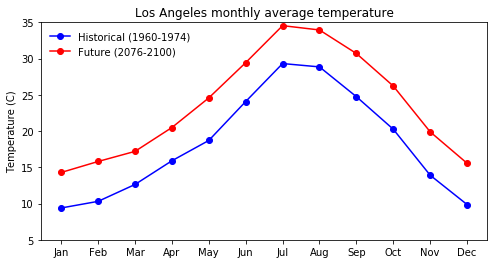

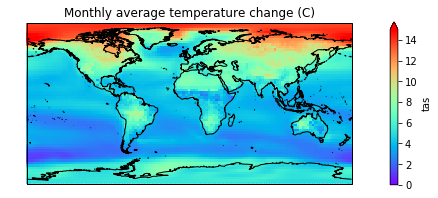

In [30]:
# Read in the netCDF files 
hist_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc')
fut_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc')

# Extract temperature and convert to degrees C
hist_tas = (hist_tas_nc['tas'] - 273) 
fut_tas = (fut_tas_nc['tas'] - 273) 

# Individual monthly climatologies
hist_tas_mon_clim = hist_tas.groupby('time.month').mean(dim='time')
fut_tas_mon_clim = fut_tas.groupby('time.month').mean(dim='time')

# Los Angeles monthly climatologies
la_hist_tas_mon_clim = hist_tas_mon_clim.sel(lat=34.05, lon=241.86, method='nearest')
la_fut_tas_mon_clim = fut_tas_mon_clim.sel(lat=34.05, lon=241.86, method='nearest')

# Month that warms the most/least
monthly_changes = la_fut_tas_mon_clim - la_hist_tas_mon_clim
#print(monthly_changes)
# November warms the most with 5.98 deg C, Feb warms the least with 3.63 deg C

# Monthly averages
hist_tas_avg = hist_tas.mean(dim='time')
fut_tas_avg = fut_tas.mean(dim='time')
change_tas_avg = fut_tas_avg - hist_tas_avg

# 1st plot - time series of monthly climatologies over LA
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(range(12), la_hist_tas_mon_clim, color='blue', marker='o', label='Historical (1960-1974)')
ax1.plot(range(12), la_fut_tas_mon_clim, color='red', marker='o', label='Future (2076-2100)')
ax1.set_xticks(range(12))
ax1.set_xticklabels(months)
ax1.set_ylim(5, 35)
ax1.set_ylabel('Temperature (C)')
ax1.set_title('Los Angeles monthly average temperature')
ax1.legend(loc='upper left', frameon=False)

# 2nd plot - global temperature changes 
fig2 = plt.figure(figsize=(8,3))
ax2 = fig2.add_subplot(1,1,1, projection=ccrs.PlateCarree())
change_tas_avg.plot.pcolormesh(ax=ax2, 
                               transform=ccrs.PlateCarree(), 
                               cmap='rainbow', 
                               vmin=0, vmax=15)
ax2.coastlines('50m')
ax2.set_title('Monthly average temperature change (C)')

Answers related to the 1st plot:
* Which month is projected to warm the most over Los Angeles? 
* Which month is projected to warm the least over Los Angeles? 
    * November warms the most with 5.98438 deg C, March warms the least with 4.57 deg C

Answers related to the 2nd plot:
* Are land or ocean regions projected to experience more warming relative to each other? Why? 
    * Land regions warm more than the ocean due to different thermal heat capacities
* Which regions across the globe are projected to experience the greatest change in average monthly temperatures? Why?
    * Arctic/northern high latitudes due to snow/ice albedo feedback
* Which regions across the globe are projected to experience the lowest change in average monthly temperatures? Why?
    * Southern Ocean due to strong winds/surface ocean mixing and diffusion of heat away from the surface